In [15]:
import os
import sys
sys.path.append('../../')

import json
import yaml
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import networkx as nx
import botometer

In [16]:
main_dir = '../..'
config_path = os.path.join(main_dir, 'config/config.json')

#load config file
assert os.path.exists(config_path)
with open(config_path) as file:
    config = json.load(file)
    
results_path= os.path.join(main_dir, config['results_dir'])


In [17]:
#read bot scores of influencers
bot_scores = {}
with open(os.path.join(results_path, f"{config['bot_scores_fname']}_{config['influencer_lower_limit']}.json")) as fp:
    bot_scores = json.load(fp)
print(len(bot_scores))

706


In [18]:
#extract overall bot score and fake follower score
overall_score = []
fake_followers = []
for user in bot_scores:
    try:
        overall_score.append(bot_scores[f"{user}"]['display_scores']['english']['overall'])
        fake_followers.append(bot_scores[f"{user}"]['display_scores']['english']['fake_follower'])
    except:
        #print(f"{user}: bot score error")
        pass

## Bot Score Distributions

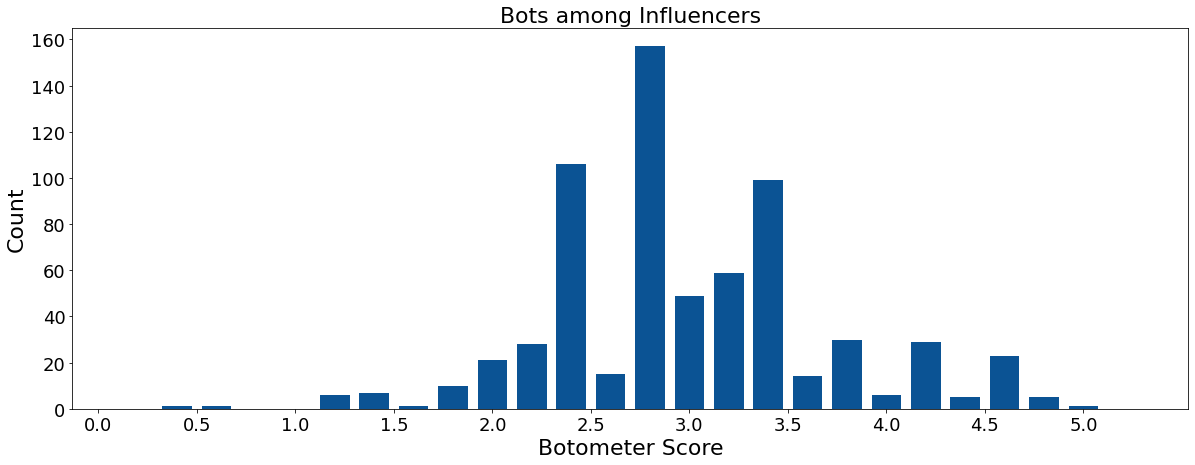

In [21]:
overall_score = np.asarray(overall_score)
histogram = np.histogram(np.asarray(overall_score), bins=np.arange(0, 5.25, 0.2))
fig = plt.figure(figsize=(20,7))
plt.bar(histogram[1][1:], histogram[0],width=0.15, color='#0b5394')
plt.xticks(np.arange(0,5.5, 0.5), fontsize=18)
plt.xlabel("Botometer Score", fontsize=22)
plt.yticks(fontsize=18)
plt.title('Bots among Influencers',fontsize=22)
plt.ylabel("Count", fontsize=22)

plot_path = os.path.join(main_dir, config['plots_dir'])
fig.savefig(os.path.join(plot_path, 'botometer_bot_score_influencer_1000.png'))


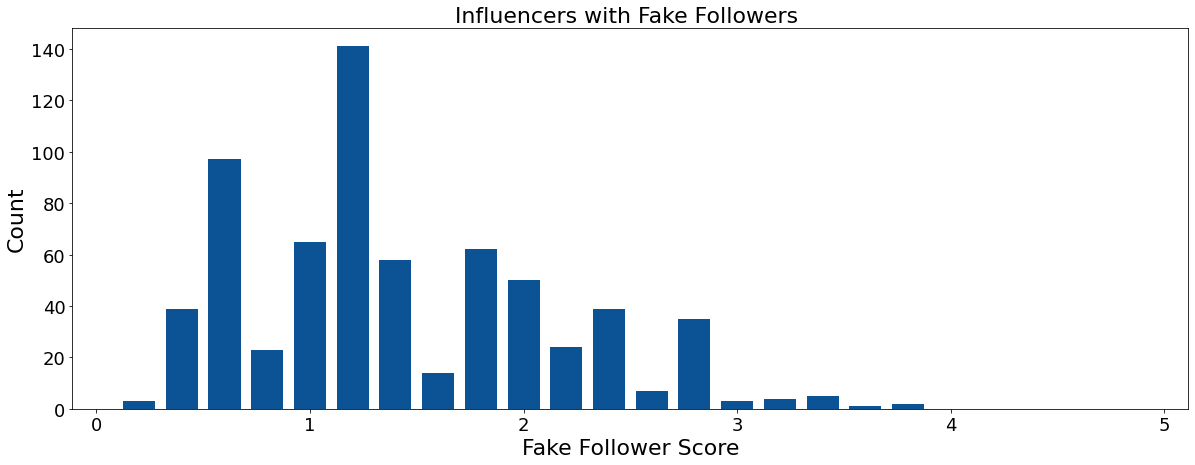

In [22]:
fake_followers = np.asarray(fake_followers)
histogram = np.histogram(np.asarray(fake_followers), bins=np.arange(0, 5, 0.2))
plt.figure(figsize=(20,7))
plt.bar(histogram[1][1:], histogram[0],width=0.15, color='#0b5394')
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xlabel("Fake Follower Score", fontsize=22)
plt.ylabel("Count", fontsize=22)
plt.title('Influencers with Fake Followers ',fontsize=22)

plot_path = os.path.join(main_dir, config['plots_dir'])
fig.savefig(os.path.join(plot_path, 'botometer_fakefollowers_score_influencer_1000.png'))
